<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/5_3%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C%EC%99%80_%EC%B8%A1%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [ ]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

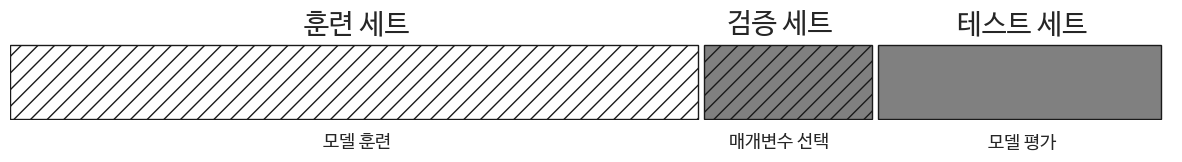

In [ ]:
mglearn.plots.plot_threefold_split()

# 5.3 평가 지표와 측정
지금까지 분류 성능 평가에 정확도를 사용했고, 회귀 성능 평가에는 R^2을  사용했다. 그러나 주어진 데이터셋에 대한 지도 학습모델의 성능을 재는 방법은 그 외에도 많다.실전에서 애플리게이션에 따라 이런 평가 지표가 적합하지 않을 수 있으므로 모델을 선택하고 매개변수를 튜닝할 때 올바른 지표를 선택하는 것이 중요하다.

\
### 5.3.1 최종 목표를 기억하라
평가 지표를 선택할 때 머신러닝 앱의 최종 목표를 기억해야 한다.예특을 만드는 것 뿐 아니라 큰 의사 결정 프로세세의 일부로 사용는 데 더 중점을 둬야 할지 모른다. 머신러닝 지표를 선택하기 전에 비즈니스 지표라고 부르는 앱의 고차원적인 목표를 생각해야 한다. 지표에 긍정적인 영향을 주는 모델과 매게변수 선택은 이를 바탕으로 한다. 많은 경우 특정 모데리이 비즈니스에 미치는 영향은 실제 시스템을 적용해야 알 수 있다. 가령 고객 수가 10% 증가했어도  고객당 매출이 15% 줄어들 수 있다.

\
### 5.3.2 이진 분류의 평가 지표
이진 분류에는 양성 클래스와 음성클래스가 있고 우리의 관심은 양성 클래스이다. 암의 경우 진단에 있어 거짓 양성과 음성이 나올 수 있는데, 특히 주의해야 할 것은 암을 발견 못해 치료가 늦어지도록 하는 '거짓음성'일 것이다.

\
#### 불균형 데이터셋
앱에선 광고 클릭을 유도한다. 하지만 사람들에 클릭을 유도하기 위한 데이터는, 불균형 데이터셋이다. (100개의 광고중 1개만 클릭한다) 현실은 이와 같이 불균형 데이터 셋이 대부분이다. 만약 아무 모델이나 선택해도 '클릭 아님'을 예측한다면 그 모델은 99% 성능을 낼것이고 그 모델은 '좋은 모델'인지 알 수 없을 것이다.



In [ ]:
# 9:1 불균형 데이터셋
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [ ]:
# 다수의 클래스를 예측값으로 내놓는 DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 레이블:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블: [False]
테스트 점수: 0.90


거의 아무학습을 하지 않고도 90%정확도를 가졌다. 자기 모델의 정확도가 90%라고 좋아할 것이 아니다. 추세장에선 누구나 정확도가 90%가 되기도 한다.
주식도 기본 최소 정확도는 50%부터다. 다만 발생하는 수수료, 수익손해 포인트가 일치할 경우 확률 50%는, 0이라는 기본값을 향한다는 사실만 다르지만.

In [ ]:
# 실제 분류기를 사용한것
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [ ]:
# 무작위 예측, 더비가 확실이 결과가 좋지 않다.
# 그래도 80% 맞췄다.

# 불균형데이터셋 유용성 판단 평가지표가 필요하다.

from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy score: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg score: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy score: 0.80
logreg score: 0.98


### 오차 행렬

이진 뷴류 평가 결과를 나타낼 때 가장 널리 사용되는 방법

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print('오차행렬: \n', confusion)

오차행렬: 
 [[402   1]
 [  6  41]]


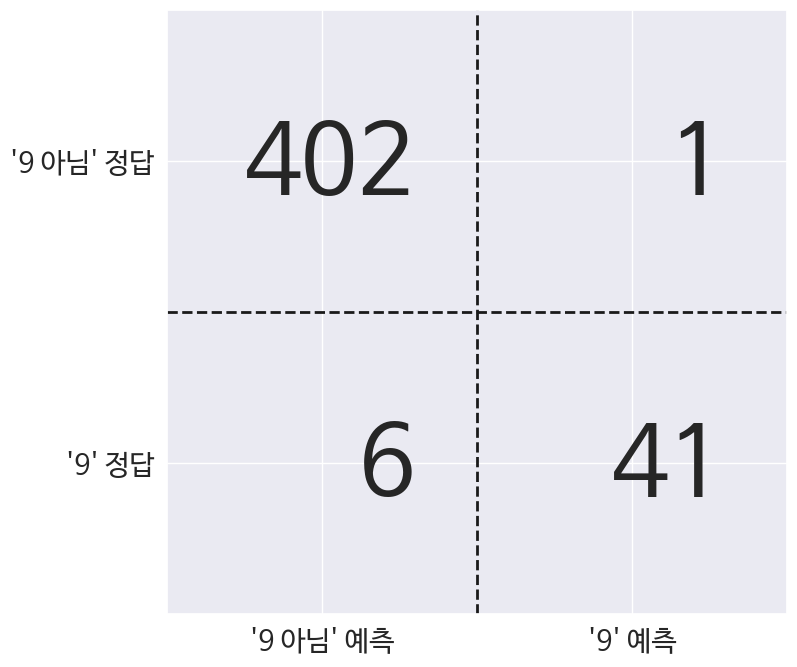

In [ ]:
mglearn.plots.plot_confusion_matrix_illustration()

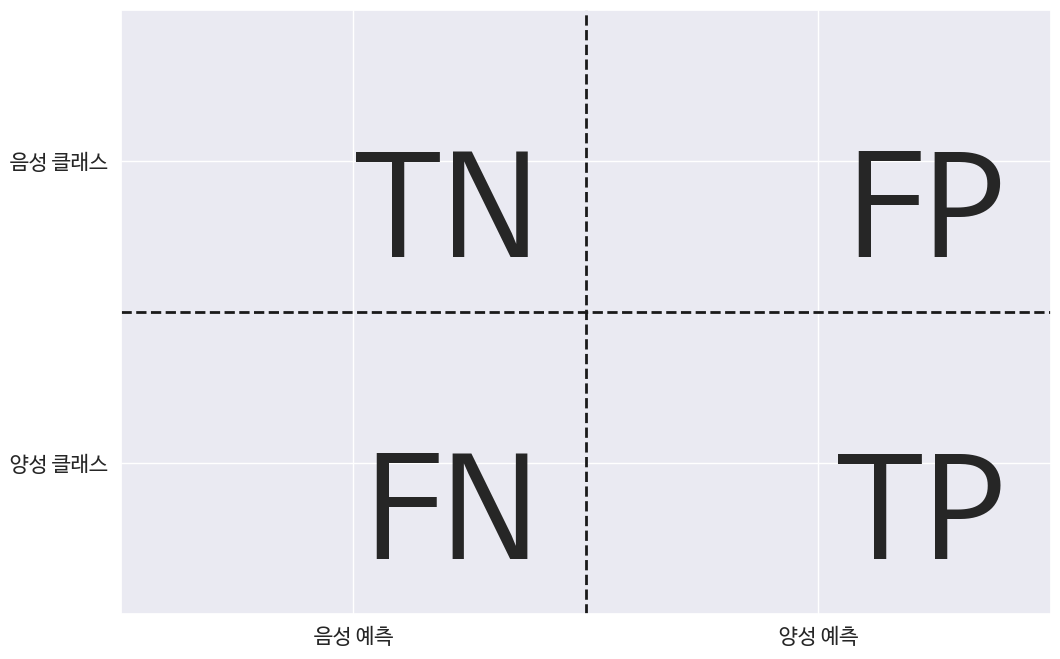

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

In [ ]:
# 오차 행렬 사용 앞서 만든 모델들 
# 더미 모델 두개, 결정트리, 로지트틱회귀을 비교해 보겠다

print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n 무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n 결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n 로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

 무작위 더미 모델:
[[366  37]
 [ 44   3]]

 결정 트리:
[[390  13]
 [ 24  23]]

 로지스틱 회귀
[[402   1]
 [  6  41]]



- 빈도 기반 은 잘못된 것이 확실하다 모두 음성으로 본다.
- 무작위는 거짓이 많다.
- 결정 트리는 위에것들 보단 낫다
- 로지스틱은 가장낫다. 그러나 전체 오차 행렬을 조사하기에 조금 번거롭다.


## 정밀도, 재현율, f점수

- 정밀도 : 거짓 양성 줄이기 (신약 개발 임상실험 줄이기 위해)
- 재현율 : 거짓 음성 줄이기 (암환자 암진단 실수 줄이기 위해)
- f-점수 : 둘 모두 봐야 천테 그림을 볼 수 있다.

\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

In [ ]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1 socre: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('무작위 더미 모델의 f1 score: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('트리 모델의 f1 socre: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 socre: {:.2f}'.format(f1_score(y_test, pred_logreg)))


빈도 기반 더미 모델의 f1 socre: 0.00
무작위 더미 모델의 f1 score: 0.07
트리 모델의 f1 socre: 0.55
로지스틱 회귀 모델의 f1 socre: 0.92


f1 점수는 정확도보다 이야하거나 설명하기 어렵다는 단점이 있다. classification_report  함수는 정밀도, 재현율, f1 점수 모두를 한번에 계산해서 깔끔하게 출력해준다

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['fake 9', 'true 9'], zero_division=0))

              precision    recall  f1-score   support

      fake 9       0.90      1.00      0.94       403
      true 9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [ ]:
print(classification_report(y_test, pred_dummy, target_names=['fake 9', 'true 9'], zero_division=0))

              precision    recall  f1-score   support

      fake 9       0.89      0.91      0.90       403
      true 9       0.07      0.06      0.07        47

    accuracy                           0.82       450
   macro avg       0.48      0.49      0.48       450
weighted avg       0.81      0.82      0.81       450



In [ ]:
print(classification_report(y_test, pred_logreg, target_names=['fake 9', 'true 9'], zero_division=0))

              precision    recall  f1-score   support

      fake 9       0.99      1.00      0.99       403
      true 9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



어떤 평가지표를 사용하느냐에 따라 점수 차이가 크다.

\
### 불확실성 고려

오차 행령과 분류 이포트가 예측 결과를 자세히 분석할 수 있도록 도와준다. 하지만 예측값은 모델에 담긴 많은 정보가 이미 손실된 상태이다.


In [ ]:
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

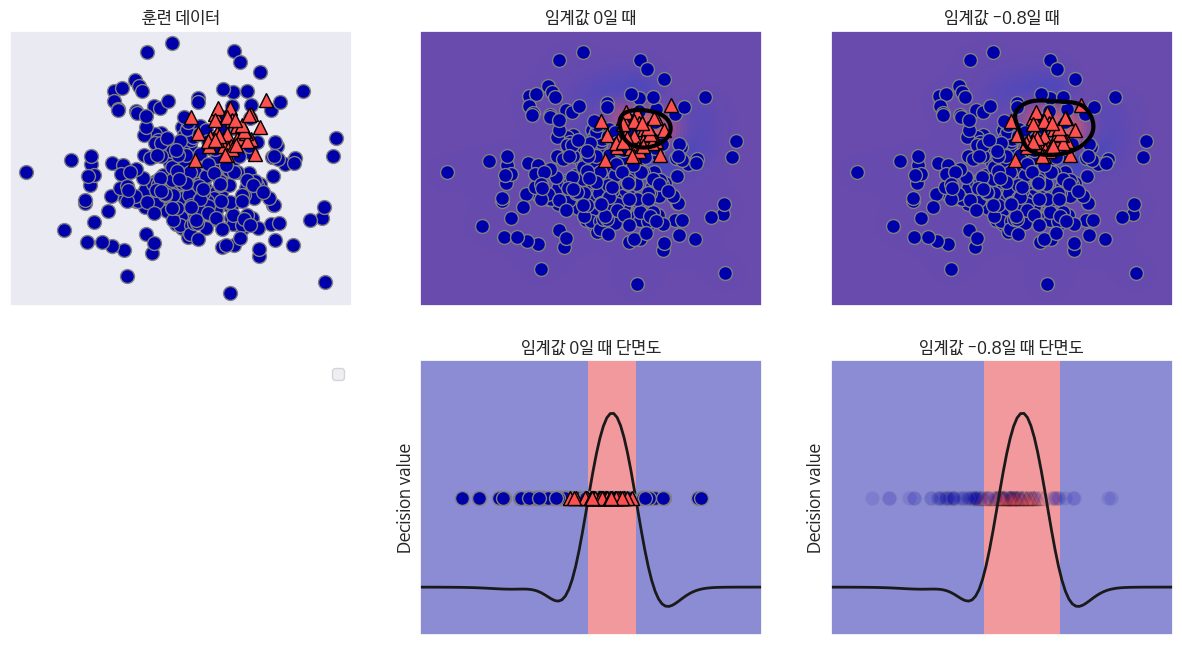

In [ ]:
mglearn.plots.plot_decision_threshold()

In [ ]:
# 정밀도 재현율 평가

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [ ]:
# 가정 암진단 처럼 재현율을 높여야 한다면, 가짜 음성을 줄이기 위해 거짓양성 증가를 감수한다.
# 잘못 분류된 1을 증가,  잘못된 0 감소 시키기 위해 임계값을 낮춘다.
y_pred_low_threshold = svc.decision_function(X_test) > -.8

In [ ]:
print(classification_report(y_test, y_pred_low_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



정밀도 낮아졌고 재현율 올랐다. 실전에는 임계 값을 선택할때 테스트셋을 사용하지 않도록 유의햐야 한다. 임계값 설정에 테스트셋을 사용하면 과도하게 낙관적인 결과를 만들 가능성이 높기 때문이다. 검증세트나 교차검증을 사용하자.

### 정밀도 재현율 고정, 운영포인트. 운영포인트를 명확히하기 위한 정밀도 재현율 곡선(ROC 곡선) 


In [32]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

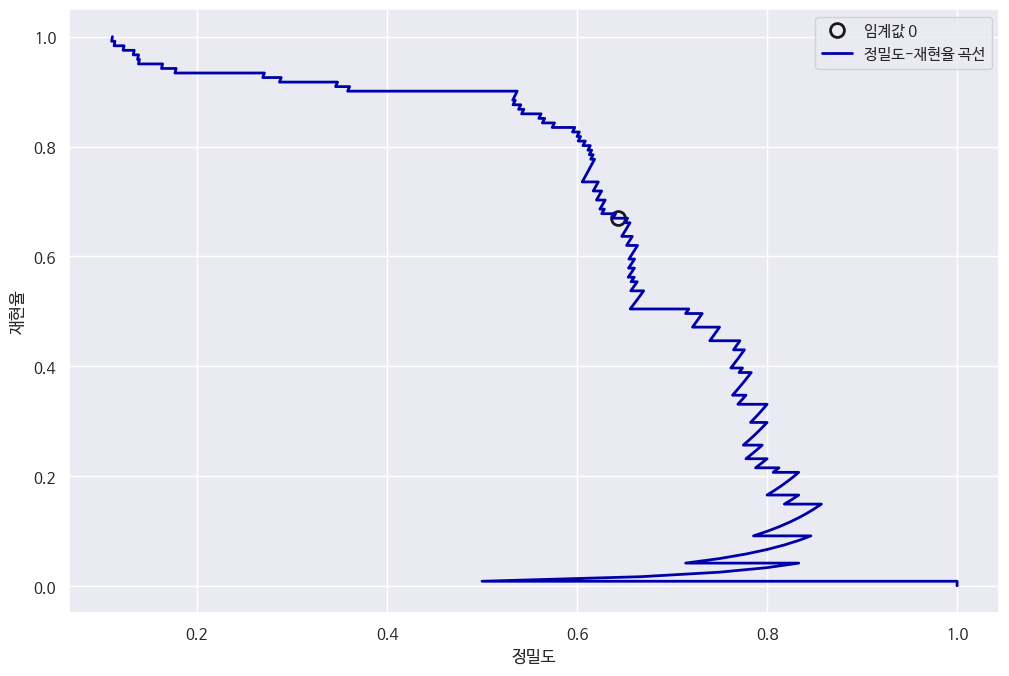

In [34]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘린다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', fillstyle= 'none', c='k', mew=2)
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

분류기기 다르면 곡선의 다른 부분에서 장점이 생긴다. 운영포인트가 달라진다.
같은데이터 셋으로 훈련한 램덤, svm을 비교해 본다.

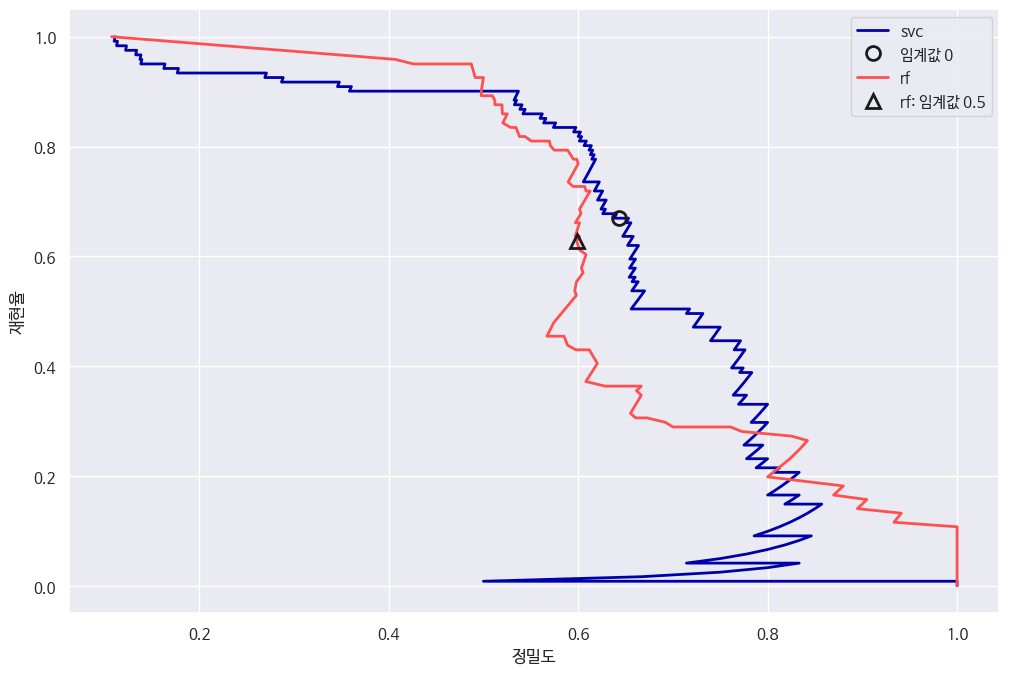

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 dicision_function 대신 predict_proba를 제공한다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='임계값 0', fillstyle= 'none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf -0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10, label='rf: 임계값 0.5', fillstyle= 'none', c='k', mew=2)

plt.xlabel('정밀도')
plt.ylabel('재현율')
plt.legend(loc='best')

재현율이 매우 높고나 정밀도가 매우 높을 때에는 램덤이 더 낫다. f1 점수만 봤다면 이점을 놓혔을 수 있다. f1 점수는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수다.

In [37]:
print('램덤 포레스트의 f1_score: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('svc의 f1_score: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

램덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


평균 정밀도는, 정밀도-재현율 곡선아내 부분의 면적이다.

In [40]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('rf_average_precision_score: {:.3f}'.format(ap_rf))
print('svc_average_precision_score: {:.3f}'.format(ap_svc))

rf_average_precision_score: 0.660
svc_average_precision_score: 0.666


f1 점수는 차이가 나지만 f1 면적에서 차이가 미미한 것으로 보아 극단값에서는 rf가 더 좋았다는 것을 알 수 있다.